<a href="https://colab.research.google.com/github/Shtrohaim/-19-23-/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D0%B0%D1%8F_%D0%BF%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87_(%D0%9F%D0%98%D0%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.impute import SimpleImputer

In [3]:
data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header=None)

In [4]:
names = ("Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class")
data.columns = names
data = data.drop(columns=["Id"])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [6]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [7]:
data['Class'].replace(
    {
       1:"building_float_processed",
       2:"building_non_float_processed",
       3:"vehicle_float_processed",
       4:"vehicle_non_float_processed",
       5:"containers",
       6:"tableware",
       7:"headlamps" 
    }, inplace=True)

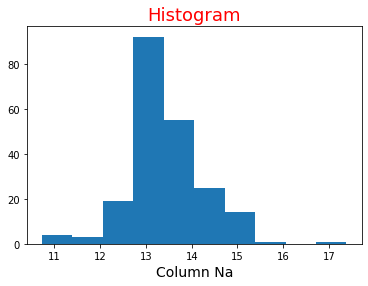

In [8]:
#1

col="Na" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
fig, ax = plt.subplots(figsize=(6,4))

ax.hist(data[col])
ax.set_xlabel("Column "+str(col), fontsize=14)
ax.set_title("Histogram", color='red', fontsize=18)

plt.show()

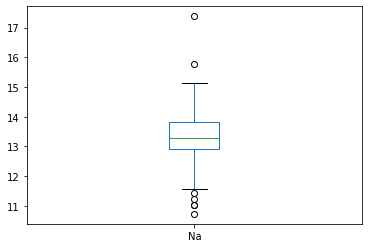

In [9]:
#2

col="Na" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
fig, ax = plt.subplots()

data[col].plot(kind='box')
plt.show()


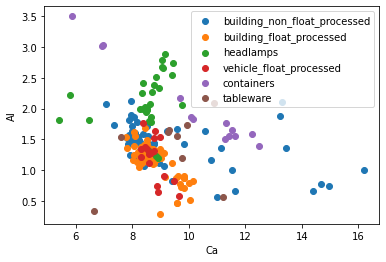

In [10]:
#3

col1="Ca" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
col2="Al" #@param ["RI","Na","Mg","Al","Si","K","Ca","Ba","Fe"]
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][ data['Class']==glassType ],
             data[col2][ data['Class']==glassType ],
             label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()

plt.show()

In [11]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index,col] = np.nan

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      201 non-null    float64
 1   Na      197 non-null    float64
 2   Mg      199 non-null    float64
 3   Al      197 non-null    float64
 4   Si      199 non-null    float64
 5   K       195 non-null    float64
 6   Ca      199 non-null    float64
 7   Ba      201 non-null    float64
 8   Fe      203 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [13]:
data.mean()

RI     1.518423
Na    13.373706
Mg     2.646131
Al     1.443299
Si    72.645276
K      0.462615
Ca     8.995779
Ba     0.166318
Fe     0.057783
dtype: float64

In [14]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.521010,13.64,2.646131,1.443299,71.780000,0.06,8.75,0.0,0.0,building_float_processed
1,1.518423,13.89,3.600000,1.360000,72.730000,0.48,7.83,0.0,0.0,building_float_processed
2,1.516180,13.53,3.550000,1.540000,72.990000,0.39,7.78,0.0,0.0,building_float_processed
3,1.517660,13.21,3.690000,1.443299,72.645276,0.57,8.22,0.0,0.0,NaN
4,1.517420,13.27,3.620000,1.240000,73.080000,0.55,8.07,0.0,0.0,NaN


In [15]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [16]:
data_fiiled_nan = data.fillna(data.mean(), ).copy()
data_fiiled_nan['Class'].fillna(data['Class'].value_counts().index.values[0], inplace=True)

In [17]:
data['Class'].value_counts().index.values[0]
data['Class'].mode()
data_fillna_mean['Class'].fillna(data['Class'].value_counts().index.values[0], inplace = True)

In [18]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [19]:
pca = PCA( )
pca.fit(data_fiiled_nan[data_fiiled_nan.columns[data_fiiled_nan.columns.values != 'Class']])

pca.explained_variance_ratio_*100

array([4.94231431e+01, 2.47735639e+01, 1.11067872e+01, 8.26622214e+00,
       3.25742382e+00, 1.76243886e+00, 1.26264185e+00, 1.47755919e-01,
       2.32141604e-05])

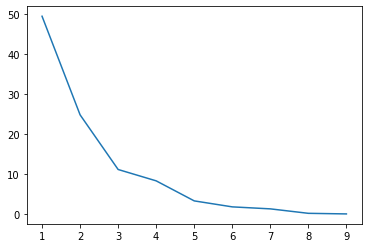

In [20]:
fig, ax = plt.subplots()
ax.plot(np.arange(1, 10) ,pca.explained_variance_ratio_*100)

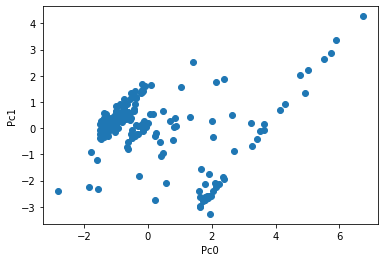

In [21]:
result = pca.transform(data_fiiled_nan[data_fiiled_nan.columns.values[data_fiiled_nan.columns.values != 'Class']])

pca_Names = []

for i in range(9):
  pca_Names.append('Pc' + str(i))

data_pca = pd.DataFrame(result,columns=pca_Names) 
fig, ax = plt.subplots()

ax.scatter(data_pca['Pc0'], data_pca['Pc1'])
ax.set_xlabel('Pc0')
ax.set_ylabel('Pc1')

plt.show()

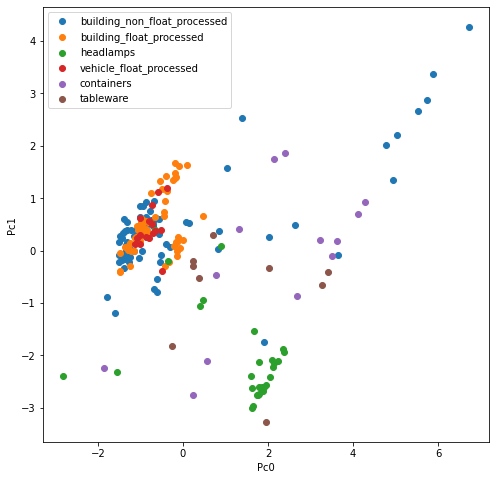

In [22]:
data_pca['Class'] = data_fillna_mean['Class'].copy()

col1 = 'Pc0'
col2 = 'Pc1'

fig, ax = plt.subplots(figsize=(8, 8))

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             label = glassType)
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.legend()

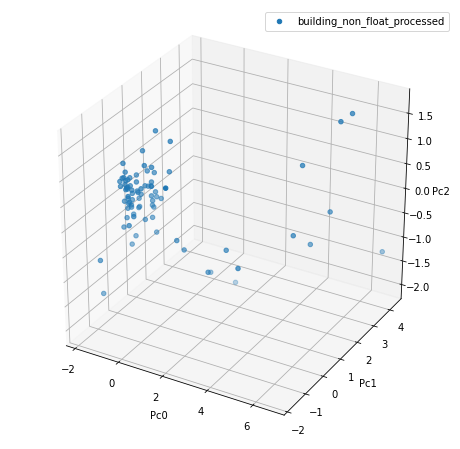

In [23]:
col1 = 'Pc0'
col2 = 'Pc1'
col3 = 'Pc2'

# fig, ax = plt.subplots(figsize=(8, 8))
fig = plt.figure(figsize = (8, 8))
ax = plt.axes(projection = '3d')

for glassType in data_pca['Class'].value_counts().index.values:
  ax.scatter(data_pca[col1][data_pca['Class'] == glassType], 
             data_pca[col2][data_pca['Class'] == glassType],
             data_pca[col3][data_pca['Class'] == glassType],
             label = glassType)
  
  ax.set_xlabel(col1)
  ax.set_ylabel(col2)
  ax.set_zlabel(col3)

  ax.legend()

  plt.show()

In [24]:
corr = data_fillna_mean.corr() 
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.199601,-0.123550,-0.350647,-0.500347,-0.243656,0.805247,-0.015623,0.158537
Na,-0.199601,1.000000,-0.233271,0.109717,-0.067871,-0.302308,-0.225145,0.200562,-0.215389
Mg,-0.123550,-0.233271,1.000000,-0.457142,-0.157993,0.094436,-0.452896,-0.426007,0.081277
Al,-0.350647,0.109717,-0.457142,1.000000,-0.004891,0.192590,-0.199872,0.490419,-0.052851
Si,-0.500347,-0.067871,-0.157993,-0.004891,1.000000,-0.063929,-0.189376,-0.090444,-0.092044
K,-0.243656,-0.302308,0.094436,0.192590,-0.063929,1.000000,-0.272948,-0.038006,0.013208
Ca,0.805247,-0.225145,-0.452896,-0.199872,-0.189376,-0.272948,1.000000,-0.078536,0.120914
Ba,-0.015623,0.200562,-0.426007,0.490419,-0.090444,-0.038006,-0.078536,1.000000,-0.030661
Fe,0.158537,-0.215389,0.081277,-0.052851,-0.092044,0.013208,0.120914,-0.030661,1.000000


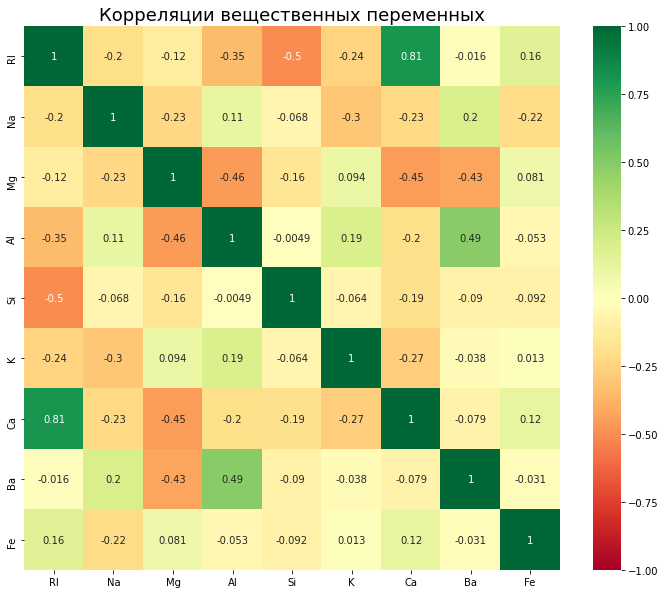

In [25]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr, annot=True, vmax=1, vmin = -1, cmap='RdYlGn', )
ax.set_title('Корреляции вещественных переменных', fontsize = 18)

plt.show()

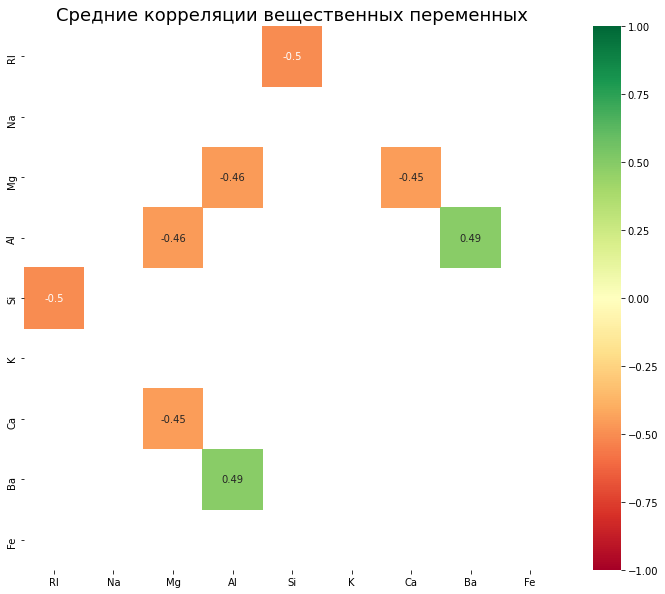

In [26]:
# corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)]

plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.45 < corr[corr < 0.75]) | (corr[corr > -0.75] < -0.45)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Средние корреляции вещественных переменных', fontsize = 18)

plt.show()

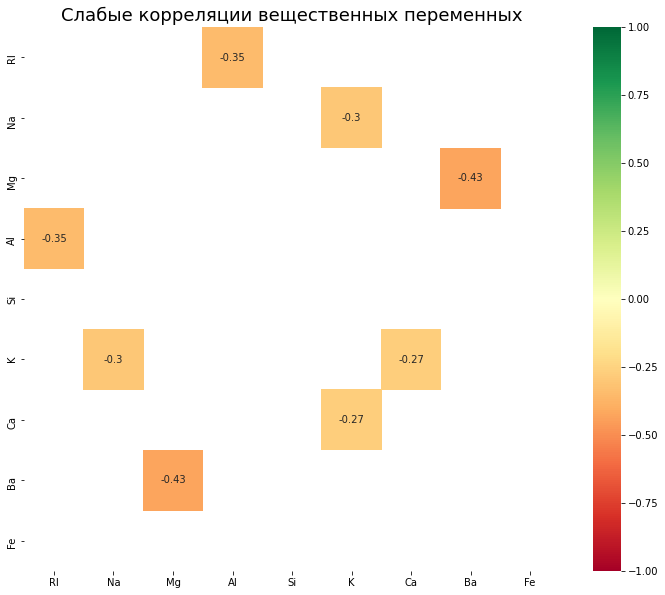

In [27]:
plt.figure(figsize=(12, 10))
ax = sns.heatmap(corr[(0.25 < corr[corr < 0.45]) | (corr[corr > -0.45] < -0.25)], 
                 annot=True, vmax=1, vmin = -1, cmap='RdYlGn')

ax.set_title('Слабые корреляции вещественных переменных', fontsize = 18)

plt.show()

In [28]:
forest = ExtraTreesClassifier(n_estimators=100)

In [29]:
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [30]:
forest.feature_importances_

array([0.12445898, 0.09512875, 0.18494954, 0.13166585, 0.0893586 ,
       0.1158621 , 0.12753631, 0.07399037, 0.05704949])

In [31]:
np.sort(forest.feature_importances_, )[::-1]

array([0.18494954, 0.13166585, 0.12753631, 0.12445898, 0.1158621 ,
       0.09512875, 0.0893586 , 0.07399037, 0.05704949])

In [32]:
np.argsort(forest.feature_importances_, )[::-1]

array([2, 3, 6, 0, 5, 1, 4, 7, 8])

In [33]:
importances = forest.feature_importances_
indices = np.argsort(forest.feature_importances_, )[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(9):
    print("%d. feature %s (%f)" % (f + 1, data_fillna_mean.columns.values[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature Mg (0.184950)
2. feature Al (0.131666)
3. feature Ca (0.127536)
4. feature RI (0.124459)
5. feature K (0.115862)
6. feature Na (0.095129)
7. feature Si (0.089359)
8. feature Ba (0.073990)
9. feature Fe (0.057049)


In [34]:
std = np.std( [tree.feature_importances_ for tree in forest.estimators_], axis=0)
std

array([0.03876676, 0.02813899, 0.04594323, 0.05093052, 0.0227866 ,
       0.03895627, 0.03843953, 0.04108715, 0.01645691])

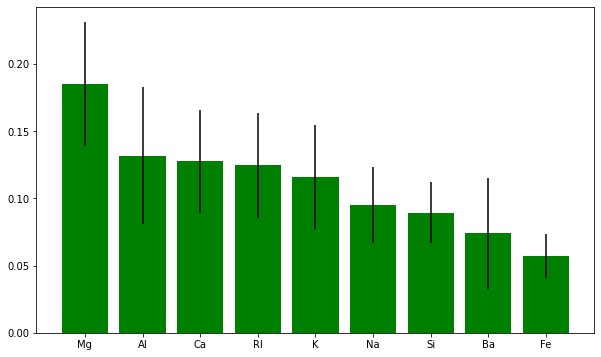

In [35]:
fig, ax = plt.subplots(figsize=(10,6))

ax.bar(data_fillna_mean.columns.values[indices], importances[indices],
       color="g", yerr=std[indices], align="center")

plt.show()